# Exploration for corpus stats and initial topic modeling experiments

In [1]:
from pathlib import Path
import string

import pandas as pd
import seaborn as sns


In [2]:
# Reusable functions 
def get_stop_list(stop_file):
    """Returns a set of stop words from file where
    they're one per line
    :param stop_file: Path object
    """
    text = stop_file.read_text(encoding="utf-8")
    stops = set([s.strip() for s in text.split("\n")])
    if '' in stops:
        stops.remove('')
    return stops

def get_stopped_text(text, stop_set):
    """Remove stop words from text after splitting
    on whitespace
    :param text: str
    :param stop_set: set of str
    """
    return " ".join([s for s in text.split() if s.lower() not in stop_set])

def get_clean_text(text, keep_set):
    """Downcase and strip punctuation
    :param text: str
    :param keep_set: set of str, words that should be kept
    """
    tmp = text.translate(str.maketrans('', '', string.punctuation)).lower()
    return " ".join([t for t in tmp.split() if t in keep_set])

def get_num_tokens(text):
    """Returns the number of tokens after splitting on whitespace.
    :param text: str
    """
    return len(text.split())


# Read corpus

In [3]:
CORPUS_DIR = Path('/home/virginia/workspace/topic-modeling-study/russian_novels_first_experiment')
DOCS_TSV = CORPUS_DIR / 'russian_novels.tsv'
STOP_LIST = CORPUS_DIR / 'russian_novels_stopped.txt'
ORIGINAL_WORD_COUNTS = CORPUS_DIR / 'russian_novels_counts.tsv'


In [4]:
stops = get_stop_list(STOP_LIST)
print("Number of words pruned from vocab:", len(stops))

Number of words pruned from vocab: 245783


In [5]:
original_word_counts = pd.read_csv(ORIGINAL_WORD_COUNTS, sep='\t', encoding='utf-8', names=['word','term_freq', 'doc_freq']) 
original_word_counts.head()

,word,term_freq,doc_freq
0,что,93858,10832
1,как,52378,10480
2,его,47691,10058
3,это,37379,9765
4,все,30410,9307


In [6]:
stop_word_series = pd.DataFrame({'word':list(stops)})
original_stop_counts = pd.merge(stop_word_series, original_word_counts, on='word')
original_stop_counts.sort_values(by=['term_freq'], inplace=True, ascending=False)
display(original_stop_counts.head())
display(original_stop_counts.tail())
print("Total number of tokens dropped by pruning:", original_stop_counts['term_freq'].sum())


,word,term_freq,doc_freq
186567,что,93858,10832
46051,как,52378,10480
193120,его,47691,10058
218982,она,38296,7712
92964,это,37379,9765


,word,term_freq,doc_freq
134517,пайсан-палас,1,1
134518,плотоподобной,1,1
134519,отемнялось,1,1
48831,лимону,1,1
160385,приоткрывался,1,1


Total number of tokens dropped by pruning: 1488296


In [7]:
corpus = pd.read_csv(DOCS_TSV, sep='\t', encoding='utf-8', names=['doc_id', 'author', 'text'], index_col=0)
corpus['author'] = corpus['author'].astype('category')

In [8]:
print(corpus.columns)
print(corpus.index)
corpus.head()

Index(['author', 'text'], dtype='object')
Index(['Turgenev_Rudin_0', 'Turgenev_Rudin_1', 'Turgenev_Rudin_2',
       'Turgenev_Rudin_3', 'Turgenev_Rudin_4', 'Turgenev_Rudin_5',
       'Turgenev_Rudin_6', 'Turgenev_Rudin_7', 'Turgenev_Rudin_8',
       'Turgenev_Rudin_9',
       ...
       'Bulgakov_Diavoliada_11', 'Bulgakov_Diavoliada_12',
       'Bulgakov_Diavoliada_13', 'Bulgakov_Diavoliada_14',
       'Bulgakov_Diavoliada_15', 'Bulgakov_Diavoliada_16',
       'Bulgakov_Diavoliada_17', 'Bulgakov_Diavoliada_18',
       'Bulgakov_Diavoliada_19', 'Bulgakov_Diavoliada_20'],
      dtype='object', name='doc_id', length=10967)


,author,text
doc_id,,
Turgenev_Rudin_0,Turgenev,I Было тихое летнее утро. Солнце уже довольно ...
Turgenev_Rudin_1,Turgenev,"-- Ну, прощай, Матрена! -- проговорила Алексан..."
Turgenev_Rudin_2,Turgenev,Александра Павловна отправилась тихонько назад...
Turgenev_Rudin_3,Turgenev,"-- Вас Дарья Михайловна ко мне прислала, говор..."
Turgenev_Rudin_4,Turgenev,"-- Ступай, барин, право... Константин Диомидыч..."


In [9]:
corpus['clean_text'] = corpus['text'].apply(get_clean_text)
corpus.head(2)

,author,text,clean_text
doc_id,,,
Turgenev_Rudin_0,Turgenev,I Было тихое летнее утро. Солнце уже довольно ...,i было тихое летнее утро солнце уже довольно в...
Turgenev_Rudin_1,Turgenev,"-- Ну, прощай, Матрена! -- проговорила Алексан...",ну прощай матрена проговорила александра пав...


In [11]:
corpus['stopped_text'] = corpus['clean_text'].apply(get_stopped_text, args=(stops,))
corpus.head(2)

,author,text,clean_text,stopped_text
doc_id,,,,
Turgenev_Rudin_0,Turgenev,I Было тихое летнее утро. Солнце уже довольно ...,i было тихое летнее утро солнце уже довольно в...,i тихое летнее утро солнце довольно высоко сто...
Turgenev_Rudin_1,Turgenev,"-- Ну, прощай, Матрена! -- проговорила Алексан...",ну прощай матрена проговорила александра пав...,ну прощай матрена проговорила александра павло...


In [10]:
corpus['original_text_downcase'] = corpus['text'].str.lower()
corpus.head(2)

,author,text,stopped_text,original_text_downcase
doc_id,,,,
Turgenev_Rudin_0,Turgenev,I Было тихое летнее утро. Солнце уже довольно ...,i тихое летнее утро солнце довольно высоко сто...,i было тихое летнее утро. солнце уже довольно ...
Turgenev_Rudin_1,Turgenev,"-- Ну, прощай, Матрена! -- проговорила Алексан...",ну прощай матрена проговорила александра павло...,"-- ну, прощай, матрена! -- проговорила алексан..."


In [27]:
corpus['doc_length'] = corpus['clean_text'].apply(get_num_tokens)
corpus['stopped_length'] = corpus['stopped_text'].apply(get_num_tokens)
corpus.head(2)

,author,text,clean_text,stopped_text,doc_length,stopped_length
doc_id,,,,,,
Turgenev_Rudin_0,Turgenev,I Было тихое летнее утро. Солнце уже довольно ...,i было тихое летнее утро солнце уже довольно в...,i тихое летнее утро солнце довольно высоко сто...,485,399
Turgenev_Rudin_1,Turgenev,"-- Ну, прощай, Матрена! -- проговорила Алексан...",ну прощай матрена проговорила александра пав...,ну прощай матрена проговорила александра павло...,477,370


In [54]:
from sklearn.feature_extraction.text import CountVectorizer 
def documents_to_word_counts(corpus_df, text_col, author_col):
    """Gets word counts by author using the specified text_col as documents
    """
    authors = set(corpus_df[author_col])
    for a in ['Turgenev']:
        author_texts = list(corpus_df[corpus_df[author_col]==a][text_col])
        cv = CountVectorizer()
        author_count = cv.fit_transform(author_texts)
        author_df = pd.DataFrame(author_count.toarray(),
                                 columns = cv.get_feature_names())
        display(author_df.head())



        

In [55]:
documents_to_word_counts(corpus, 'clean_text', 'author')

,000,0на,10,101,11м,138,143,15,1500,1786,...,ястребом,ято,ящик,ящика,ящиках,ящике,ящики,ящиков,ящичек,ёце
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Corpus statistics
## Original (unpruned) corpus
Corpus is https://github.com/ginic/RussianNovels/tree/cleanups


In [28]:
print("Total documents:", len(corpus))
print("Document length statistics:")
print("Total tokens:", corpus['doc_length'].sum())
corpus['doc_length'].describe()

Total documents: 10967
Document length statistics:
Total tokens: 6454303


count    10967.000000
mean       588.520379
std        309.944873
min          0.000000
25%        482.000000
50%        499.000000
75%        549.000000
max       6724.000000
Name: doc_length, dtype: float64

In [29]:
author_groupby = corpus.groupby('author')

In [30]:
docs_by_author = author_groupby['text'].size().reset_index(name="doc_count").sort_values('doc_count', ascending=False)
docs_by_author['doc_count'].describe()

count      23.000000
mean      476.826087
std       529.430453
min        15.000000
25%       128.000000
50%       224.000000
75%       591.500000
max      1621.000000
Name: doc_count, dtype: float64

In [31]:
print("Most prolific by docs")
display(docs_by_author.head())
print("Least prolific by docs")
display(docs_by_author.tail())

Most prolific by docs


,author,doc_count
16,Tolstoi,1621
7,Gorky,1570
14,Sholokhov,1301
2,Dostoyevsky,1271
10,Nabokov,1228


Least prolific by docs


,author,doc_count
13,SKhvoshchinskaya,77
21,Zhukova,56
4,Gan,52
19,Volkonskaya,25
22,Zinovieva-Annibal,15


<AxesSubplot:xlabel='doc_count', ylabel='author'>

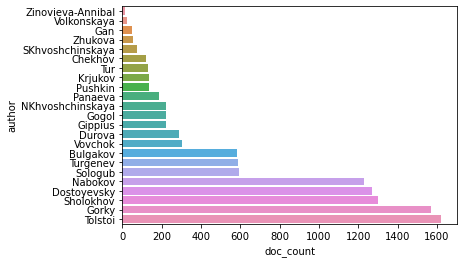

In [32]:
sns.barplot(data=docs_by_author, y='author', x='doc_count', order=docs_by_author.sort_values('doc_count').author)

In [33]:
tokens_by_author = author_groupby['doc_length'].sum().reset_index(name='token_count').sort_values('token_count', ascending=False)
tokens_by_author['token_count'].describe()

count    2.300000e+01
mean     2.806219e+05
std      3.192384e+05
min      7.224000e+03
25%      7.021700e+04
50%      1.215240e+05
75%      3.189045e+05
max      1.007414e+06
Name: token_count, dtype: float64

In [34]:
print("Most prolific by tokens")
display(tokens_by_author.head())
print("Least prolific by tokens")
display(tokens_by_author.tail())

Most prolific by tokens


,author,token_count
10,Nabokov,1007414
2,Dostoyevsky,922542
16,Tolstoi,854063
7,Gorky,775674
14,Sholokhov,627932


Least prolific by tokens


,author,token_count
13,SKhvoshchinskaya,42351
4,Gan,36801
21,Zhukova,35319
19,Volkonskaya,13158
22,Zinovieva-Annibal,7224


<AxesSubplot:xlabel='token_count', ylabel='author'>

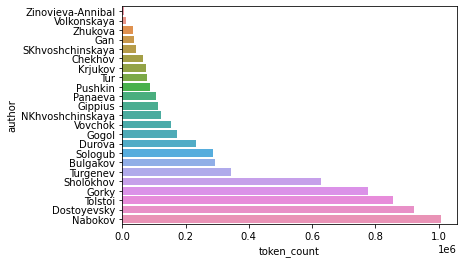

In [35]:
sns.barplot(data=tokens_by_author, y='author', x='token_count', order=tokens_by_author.sort_values('token_count').author)

## Pruned corpus
Mallet corpus was pruned using the following settings:
- `MIN_TERM_FREQ := 5`: A term is pruned if it appears in less than 5 documents
 - `MIN_IDF := 1.39`: For Mallet, a given term's idf = ln(|corpus|/doc_freq), so 1.39 is 25% of corpus. Terms are pruned if they are in more than 25% of documents

Prune by running: `mallet prune --input input.mallet --output output_pruned.mallet --min-idf $(MIN_IDF) --prune-count $(MIN_TERM_FREQ)`


In [36]:
PRUNED_COUNTS = CORPUS_DIR / 'russian_novels_pruned_counts.tsv'
pruned_counts = pd.read_csv(PRUNED_COUNTS, sep='\t', encoding='utf-8', names=['word','term_freq', 'doc_freq']) 
display(pruned_counts.head())
print("Total tokens in pruned corpus according to Mallet (should be close to 'Total tokens' in next cell):", pruned_counts['term_freq'].sum())

,word,term_freq,doc_freq
0,точно,3785,2713
1,стал,3587,2703
2,этой,3446,2689
3,совсем,3731,2632
4,всего,3454,2607


Total tokens in pruned corpus (should be close to 'Total tokens' in next cell): 3473013


TODO: Figure out why these two 'total tokens' values are so different - is it numbers or some other normalization from mallet that I haven't figured in

In [37]:
print("Document length statistics:")
print("Total tokens:", corpus['stopped_length'].sum())
corpus['stopped_length'].describe()

Document length statistics:
Total tokens: 4977047


count    10967.000000
mean       453.820279
std        234.219688
min          0.000000
25%        373.000000
50%        391.000000
75%        425.500000
max       5094.000000
Name: stopped_length, dtype: float64

In [38]:
pruned_tokens_by_author = author_groupby['stopped_length'].sum().reset_index(name='token_count_after_pruning').sort_values('token_count_after_pruning', ascending=False)
pruned_tokens_by_author['token_count_after_pruning'].describe()

count        23.000000
mean     216393.347826
std      244845.574124
min        5313.000000
25%       55075.500000
50%       91906.000000
75%      249960.000000
max      766265.000000
Name: token_count_after_pruning, dtype: float64

In [39]:
print("Most prolific by tokens after pruning")
display(pruned_tokens_by_author.head())
print("Least prolific by tokens after pruning")
display(pruned_tokens_by_author.tail())

Most prolific by tokens after pruning


,author,token_count_after_pruning
10,Nabokov,766265
2,Dostoyevsky,702829
16,Tolstoi,650358
7,Gorky,608034
14,Sholokhov,493675


Least prolific by tokens after pruning


,author,token_count_after_pruning
13,SKhvoshchinskaya,32619
4,Gan,28917
21,Zhukova,26960
19,Volkonskaya,10069
22,Zinovieva-Annibal,5313


<AxesSubplot:xlabel='token_count_after_pruning', ylabel='author'>

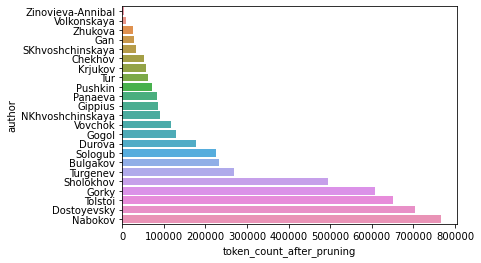

In [40]:
sns.barplot(data=pruned_tokens_by_author, y='author', x='token_count_after_pruning', order=pruned_tokens_by_author.sort_values('token_count_after_pruning').author)

TODO: Normalized token counts per document by author

# Analysis of topics
A topic model was trained on the pruned corpus with the following settings:
- `NUM_TOPICS := 100`
- `NUM_ITERS := 1000`
- `OPTIMIZE_INTERVAL := 20`
- `OPTIMIZE_BURN_IN := 50`

Mallet training command:
`mallet train-topics $(MALLET_TOPIC_FLAGS) --input input_pruned.mallet --output-state $(state) --output-model $(output_model) --output-doc-topics $(doc_topics) --output-topic-keys $(topic_keys)`

In [21]:
EXPERIMENT_DIR = Path('/home/virginia/workspace/topic-modeling-study/russian_novels_first_experiment/russian_novels_100topics_1000iters')
# Mallet ouput with manually added comments on topic quality
TOPIC_KEYS = EXPERIMENT_DIR / 'russian_novels_100topics_1000iters_topic_keys_with_comments.tsv'

In [22]:
topics = pd.read_csv(TOPIC_KEYS, sep='\t', encoding='utf-8', index_col=0)
topics.head()

,topic_proportion_per_doc,tokens,comment
tid,,,
0,0.01269,вера александровна любовь васильевна ольга зоя...,Names
1,0.09763,чай стакан стол вина стола вино пить выпил вод...,"Drinking – tea, cup, table, wine, vodka, coffee"
2,0.04519,самгин самгина клим самгину варвара точно чтоб...,Gorky – The Life of Klim Samgin
3,0.01990,франц марта драйер поезд вагона станции вагон ...,"Traveling and trains, but also Franz Dreyer fr..."
4,0.21084,могла говорила сама знала думала хотела говори...,Past tense feminine verbs


## Author entropy
Produced with command:
`python ~/workspace/authorless-tms/topic_author_correlation.py --input russian_novels.tsv --vocab russian_novels_pruned_vocab.txt --input-state russian_novels_100topics_1000iters/russian_novels_100topics_1000iters.gz --output russian_novels_100topics_1000iters/russian_novels_100topics_1000iters_author_correlation.tsv`


In [23]:
AUTHOR_CORRELS = EXPERIMENT_DIR /'russian_novels_100topics_1000iters_author_correlation.tsv'

In [24]:
author_correls = pd.read_csv(AUTHOR_CORRELS, sep='\t', encoding='utf-8', index_col=0)
author_correls.head()

,Author Entropy,Minus Major Author,Balanced Authors
Topic,,,
0,1.713103,0.172548,0.212536
1,2.581627,0.011270,0.065647
2,0.206651,0.428270,0.443944
3,1.347237,0.198656,0.296218
4,2.496419,0.008288,0.024083


<AxesSubplot:xlabel='Author Entropy', ylabel='Count'>

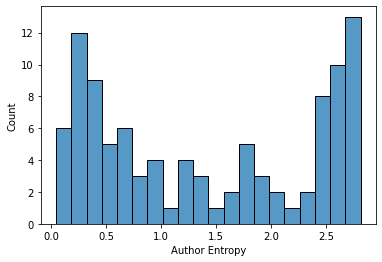

In [25]:
sns.histplot(data=author_correls['Author Entropy'], bins=20)

<AxesSubplot:xlabel='Minus Major Author', ylabel='Count'>

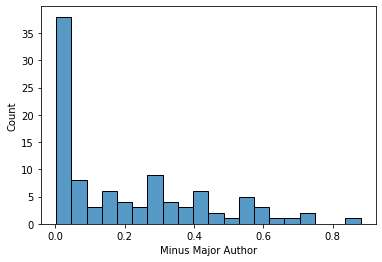

In [26]:
sns.histplot(data=author_correls['Minus Major Author'], bins=20)

<AxesSubplot:xlabel='Balanced Authors', ylabel='Count'>

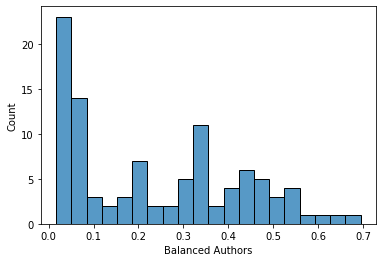

In [27]:
sns.histplot(data=author_correls['Balanced Authors'], bins=20)

In [28]:
#cols = author_correls.columns.values.tolist()
#stacked_entropies = author_correls[cols].stack().reset_index()
#stacked_entropies.rename(columns = {"level_1":"method", 0:"value"}, inplace=True)
#stacked_entropies.head()
#grid = sns.displot(data=stacked_entropies, x="value", col="method", height=10)
# TODO minus major author and balanced authors to their own plot, share x axes turned off, change bin size


In [29]:
topics_with_entropy = pd.merge(topics, author_correls, left_index=True, right_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
# Sort by increasing entropy - lower entropy means a single author dominates that topic
# Higher Minus Major Author or Balanced Authors means that the distribution changes significantly,
# so a single author is using terms differently from others
topics_with_entropy.sort_values("Author Entropy").head(100)


,topic_proportion_per_doc,tokens,comment,Author Entropy,Minus Major Author,Balanced Authors
tid,,,,,,
64,0.00204,мнe лида нeт ардалион феликс герман вeдь себe мое всe тебe гдe тeм мной моя человeк нeсколько дeло помню моей,Pronouns,0.042837,0.879995,0.694735
89,0.00759,пнин пнина гаген тимофей пнину профессор своего миссис доктор клементс шато снова джоун свой бетти друг джоан д-р лиза которая,Nabokov – Pnin,0.103448,0.733001,0.628492
36,0.00530,нежданов марианна соломин паклин сипягин маркелов нежданова калломейцев валентина машурина михайловна нежданову промолвил маркелова сипягина соломина татьяна начал алексей остродумов,Names,0.134090,0.721145,0.622843
81,0.01087,ван ада вана люсетта марина ады демон вану the аде аду мадемуазель вин ларивьер адой бланш демона моя миг ардис,Nabokov – Ada,0.146696,0.664453,0.578167
91,0.00518,граф евстафий чтоб астольда графа евстафия кауни тодеуш астольды этаго графиня нибудь своего однакож клутницкий гедвига надобно торгайло торгайлы котораго,'Count' and 'Countess' ?,0.156809,0.619591,0.542143
80,0.02326,клим лидия макаров клима лютов климу варавка иноков самгин спивак алина туробоев лидии дронов чтоб пред мать макарова диомидов дмитрий,Gorky – The Life of Klim Samgin,0.166438,0.544568,0.524330
24,0.01706,давыдов нагульнов макар разметнов давыдова факт товарищ колхоза колхоз почему давыдову лушка кондрат любишкин председатель нагульнова хлеб макара быков партии,collective farming – Sholokov,0.191821,0.541757,0.513858
40,0.00691,ортруда королева танкред афра всё меччио королевы ортруды танкреда астольф лорена имогена виктор ещё принца принц филиппо ортруде ортруду спросила,?,0.192856,0.588590,0.523801
2,0.04519,самгин самгина клим самгину варвара точно чтоб марина подумал пред снова дронов затем иванович тагильский вообще чорт безбедов кутузов сердито,Gorky – The Life of Klim Samgin,0.206651,0.428270,0.443944


## Morphological analysis of topics
Questions to answer:
- Which topics have multiple words with the same lemma? What about morphological variation on proper names?
- Which lemmas appear frequently across different topics? 
- Which topics contain many words of the same morphological type (e.g. past tense feminine sg verbs)? What types?
- Type-token ratio and character-token ration broken down by author